In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [2]:
!pip install easyocr

!pip install imutils
!pip install opencv-python-headless==4.1.2.30
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.1 MB/s 
     |████████████████████████████████| 604 kB 67.0 MB/s 
     |████████████████████████████████| 145 kB 65.6 MB/s 
     |████████████████████████████████| 47.6 MB 1.3 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.4 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.4.60
    Uninstalling opencv-python-headless-4.5.4.60:
      Successfully uninstal

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

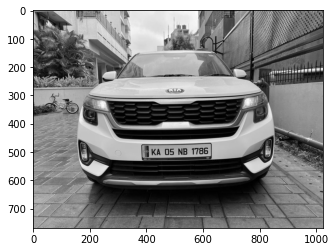

In [4]:
img = cv2.imread('/content/kia-seltos-car-number-plate-designs-1-1.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

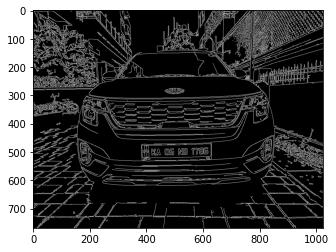

In [5]:
bfilter= cv2.bilateralFilter(gray,11,17,17)
edged= cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [6]:
keypoints= cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours= sorted(contours,key=cv2.contourArea, reverse=True)[:10]

In [7]:
location =None
for contour in contours:
  approx= cv2.approxPolyDP(contour,10,True)
  if len(approx) ==4:
    location= approx
    break

In [8]:
location

array([[[628, 472]],

       [[389, 475]],

       [[386, 518]],

       [[626, 515]]], dtype=int32)

In [9]:
mask= np.zeros(gray.shape,np.uint8)
new_image= cv2.drawContours(mask,[location],0,300,-1)
new_image= cv2.bitwise_and(img,img,mask=mask)


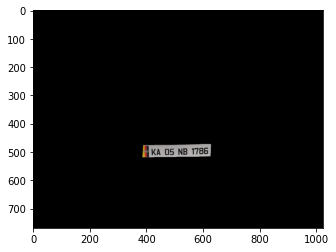

In [10]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [11]:
(x,y)= np.where(mask==255)
(x1,y1)= (np.min(x),np.min(y))
(x2,y2)= (np.max(x),np.max(y))
cropped_image= gray[x1:x2+1,y1:y2+1]

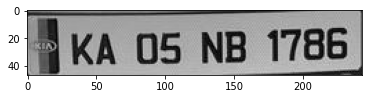

In [12]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [13]:
reader= easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[29, 7], [239, 7], [239, 45], [29, 45]],
  'KA 05 NB 1786',
  0.9925503397846722)]